# Movement prediction with Tensorflow
## Read training data

In [6]:
import numpy as np
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
# Convert PIL image to 200x200 array normalised to -0.5 to 0.5 rage.
def image_2_array(filename):
    # PIL image pil_img
    pil_img=Image.open(filename)
    pil_arr=np.array(pil_img)
    pil_max = np.amax(pil_arr)
    pil_min = np.amin(pil_arr)
    print ("Max/min:"+ str(pil_max)+"/"+str(pil_min))
    pil_scaled_arr = (pil_arr - pil_min) / (pil_max - pil_min) - 0.5
    return pil_img,pil_scaled_arr

# Invert normalised PIL image
def invert_array(arr):
    print(arr.shape)
    print(arr[100][50:60])
    inverted_arr = arr * (-1)
    print(inverted_arr[100][50:60])
    return inverted_arr
    
# Convert normalized array to PIL image
def array_2_image(arr):
    MAX = 255
    arr_scaled = (arr + 0.5) * MAX
    arr_max = np.amax(arr_scaled)
    arr_min = np.amin(arr_scaled)
    print ("Array Max/min:"+ str(arr_max)+"/"+str(arr_min))
    im = Image.fromarray(arr_scaled)
    return im

# I. Image inversion

Max/min:215/156
(200, 200)
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
Array Max/min:255.0/0.0
Max/min:215/150
(200, 200)
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
Array Max/min:255.0/0.0
Max/min:215/120
(200, 200)
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
Array Max/min:255.0/0.0
Max/min:215/150
(200, 200)
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
Array Max/min:255.0/0.0
Max/min:215/120
(200, 200)
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
Array Max/min:255.0/0.0
Max/min:215/120
(200, 200)
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
Array Max/min:255.0/0.0
Max/min:215/120
(200, 200)
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in divide


Max/min:215/126
(200, 200)
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
Array Max/min:255.0/0.0
Max/min:215/126
(200, 200)
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
Array Max/min:255.0/0.0
Max/min:215/126
(200, 200)
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
Array Max/min:255.0/0.0
Max/min:215/126
(200, 200)
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
Array Max/min:255.0/0.0
Max/min:215/126
(200, 200)
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
Array Max/min:255.0/0.0
Max/min:215/126
(200, 200)
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
Array Max/min:255.0/0.0
Max/min:215/126
(200, 200)
[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0

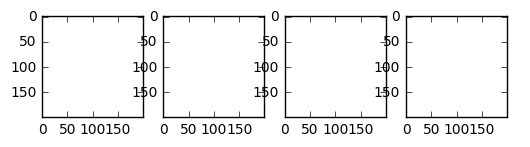

In [50]:
# Prepare inversed images
img_width=200
_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
for dataset in range(1, 11):
    for img_counter in range(1, 11):
        # Read Image
        dataset_str = str(dataset).zfill(3)
        image_str = str(img_counter).zfill(4)
        filename = "/notebooks/data001/move" + \
                dataset_str+"_"+image_str+".gif"
        #print filename
        img,a = image_2_array(filename)
        ax1.imshow(img);
        ax2.imshow(a, cmap=plt.cm.Greys);
        
        in_arr = invert_array(a)
        ax3.imshow(in_arr, cmap=plt.cm.Greys);
        new_im = array_2_image(in_arr)
        ax4.imshow(new_im);
        new_filename = "/notebooks/data001/move_inv_" + \
                dataset_str+"_"+image_str+".gif"
        new_im.save(new_filename, "GIF")


In [3]:
# Read training images into array of shape (80, 200, 200, 1)
img_width=200
train_data_onedimension = np.array([]) #np.empty([80,200,200,1])
for dataset in range(1, 9):
    for img_counter in range(1, 11):
        dataset_str = str(dataset).zfill(3)
        image_str = str(img_counter).zfill(4)
        filename = "/notebooks/data001/move" + \
                dataset_str+"_"+image_str+".gif"
        #print filename
        a = image_2_array(filename)
        train_data_onedimension = np.append(train_data_onedimension,a)        
        
print train_data_onedimension.shape

images_in_set = train_data_onedimension.size / (img_width*img_width)
train_data = train_data_onedimension.reshape(images_in_set, img_width, img_width, 1)
print train_data.shape

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


(3200000,)
(80, 200, 200, 1)


Training dataset is ready. 

*Note!* dataset should be trained with N images on input and 1 image on output. (test with N = 3..5)

Training data shape (80, 200, 200, 1)


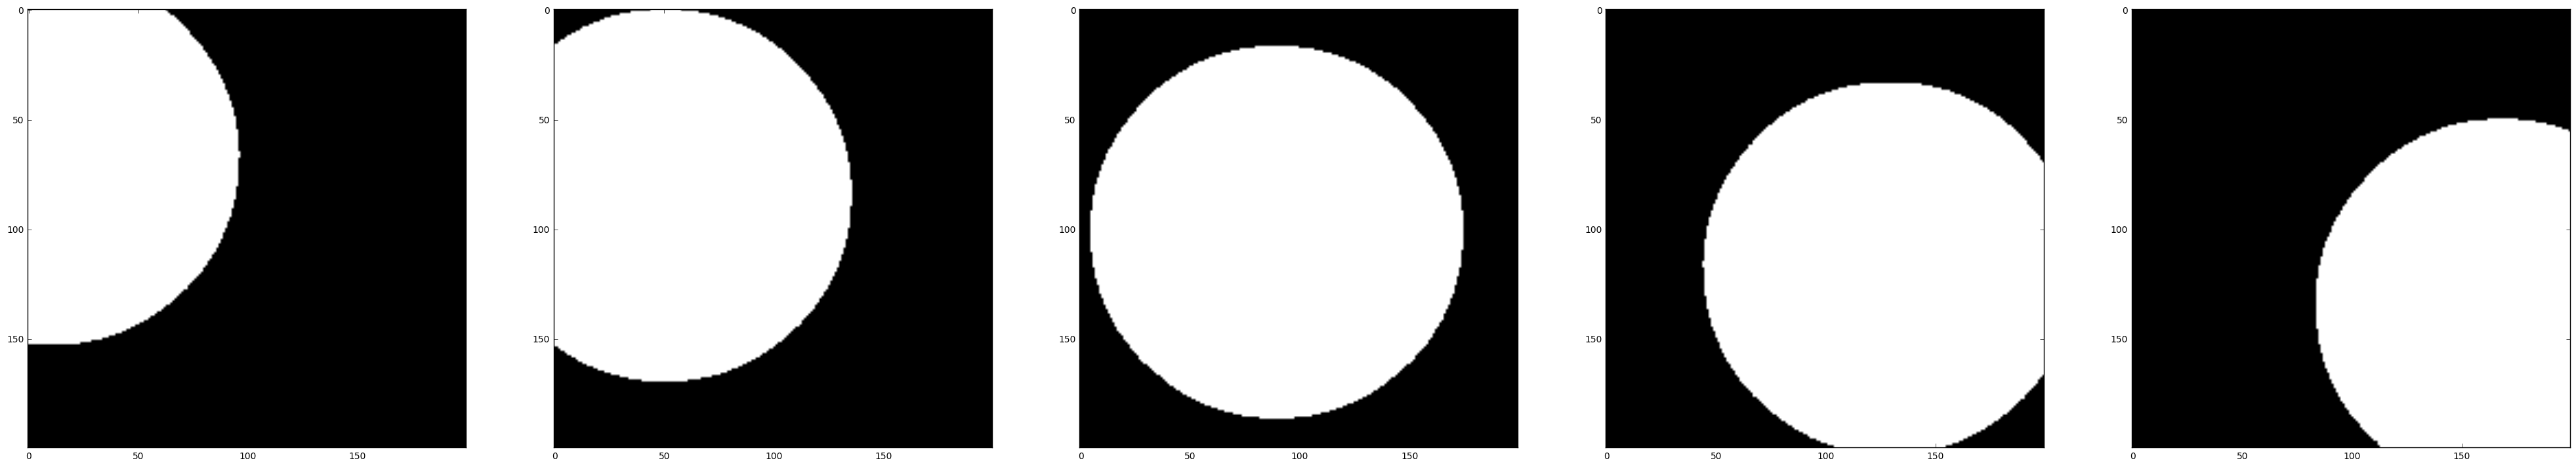

In [5]:
print 'Training data shape', train_data.shape
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(50,50))
ax1.imshow(train_data[2].reshape(img_width, img_width), cmap=plt.cm.Greys);
ax2.imshow(train_data[3].reshape(img_width, img_width), cmap=plt.cm.Greys);
ax3.imshow(train_data[4].reshape(img_width, img_width), cmap=plt.cm.Greys);
ax4.imshow(train_data[5].reshape(img_width, img_width), cmap=plt.cm.Greys);
ax5.imshow(train_data[6].reshape(img_width, img_width), cmap=plt.cm.Greys);